In [262]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt
/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv


In [263]:
data=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv")
#datatxt=pd.read_csv("/kaggle/input/house-rent-prediction-dataset/Dataset Glossary.txt",sep=" ",header=None)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [265]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [266]:
data.shape

(4746, 12)

In [267]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [268]:
data.duplicated().sum()

0

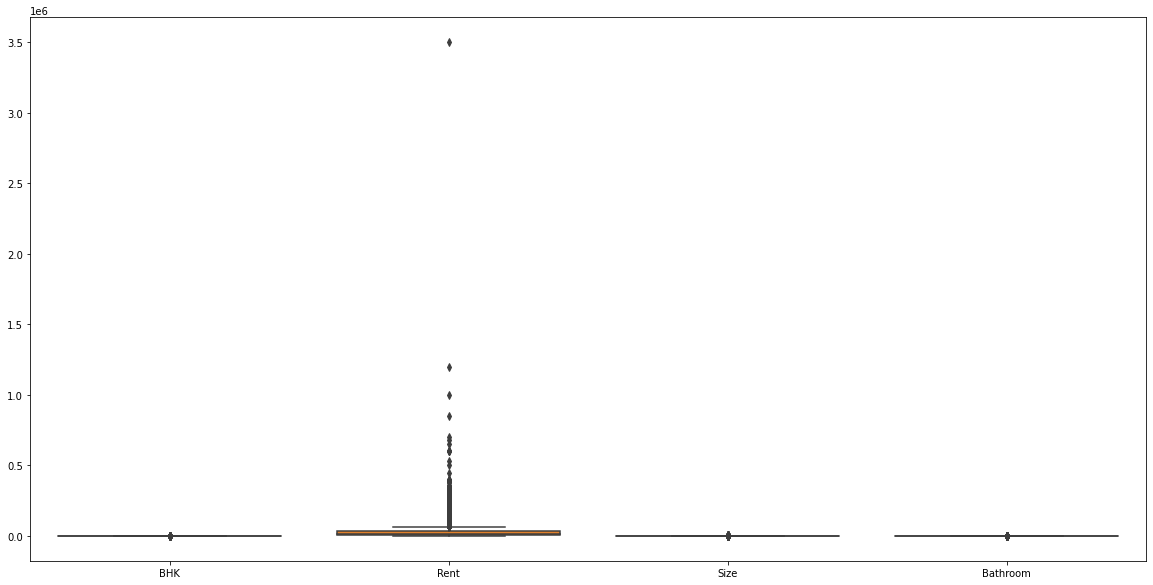

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

<AxesSubplot:>

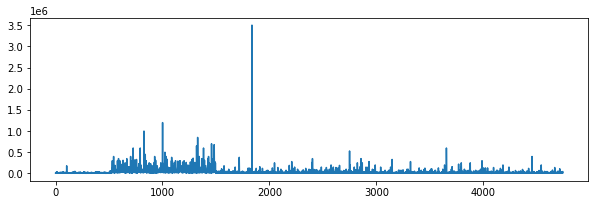

In [270]:
data.Rent.plot(kind="line",figsize=(10,3))

In [271]:
data.sort_values(by="Rent",ascending=False).head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
827,2022-05-18,4,1000000,3064,18 out of 45,Carpet Area,"Raheja Artesia, Worli",Mumbai,Semi-Furnished,Family,4,Contact Agent
1329,2022-06-23,4,850000,3200,2 out of 4,Carpet Area,Breach Candy,Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1459,2022-06-27,4,700000,3200,24 out of 24,Carpet Area,"Lady Ratan Tower, Worli",Mumbai,Furnished,Bachelors/Family,4,Contact Agent
1484,2022-07-07,4,680000,1962,18 out of 20,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
1319,2022-05-31,5,650000,3000,8 out of 10,Carpet Area,Khar West,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent
726,2022-06-20,4,600000,2500,12 out of 13,Carpet Area,"Mount Marry, Bandra West",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
1384,2022-05-27,5,600000,4500,7 out of 20,Carpet Area,Bandra West,Mumbai,Furnished,Bachelors,5,Contact Agent
792,2022-06-13,5,600000,3200,10 out of 16,Carpet Area,Bandra East,Mumbai,Semi-Furnished,Bachelors/Family,5,Contact Agent


In [272]:
data.drop(data[(data['Rent'] >600000)].index, inplace=True)

<AxesSubplot:>

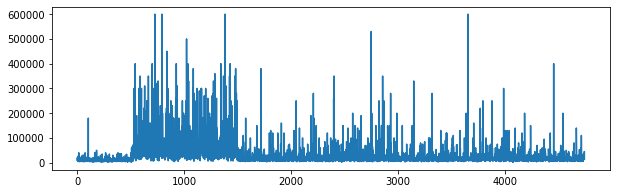

In [273]:
data.Rent.plot(kind="line",figsize=(10,3))

In [274]:
data["Floor"].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         307
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 478, dtype: int64

In [275]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [276]:
#data=data.drop('Area Type', axis=1, inplace=True)

**Feature Splitting and Scaling**

In [277]:
train_dataframe, test_dataframe = train_test_split(data, test_size = 0.2, random_state = 1, shuffle = True)

In [278]:
def prepare_training_set(train_dataframe):
    train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "3"].index, axis = 0, inplace=True)
    train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "1"].index, axis = 0, inplace=True)
    train_dataframe.drop(train_dataframe[train_dataframe["Floor"] == "Ground"].index, axis = 0, inplace=True)
    train_dataframe["Renting Floor"] = [x.split(" out of ")[0] for x in train_dataframe["Floor"].values]
    train_dataframe["Total Floor"] = [x.split(" out of ")[1] for x in train_dataframe["Floor"].values]
    train_dataframe.loc[train_dataframe["Renting Floor"] == "Ground", "Renting Floor"] = "0"
    train_dataframe.loc[train_dataframe["Renting Floor"] == "Upper Basement", "Renting Floor"]= "-1"
    train_dataframe.loc[train_dataframe["Renting Floor"] == "Lower Basement", "Renting Floor"] = "-2"
    train_dataframe["Renting Floor"] = train_dataframe["Renting Floor"].astype(int)
    train_dataframe["Total Floor"] = train_dataframe["Total Floor"].astype(int)
    train_dataframe.drop(axis = 1, labels="Floor", inplace=True)
    train_dataframe["Posted Month"] = [x.split("-")[1] for x in train_dataframe["Posted On"].values]
    train_dataframe["Posted Date"] = [x.split("-")[2] for x in train_dataframe["Posted On"].values]
    train_dataframe["Posted Month"] = train_dataframe["Posted Month"].astype(int)
    train_dataframe["Posted Date"] = train_dataframe["Posted Date"].astype(int)
    train_dataframe.drop(axis = 1, labels="Posted On", inplace=True)
    train_dataframe.drop(axis = 1, labels = "Area Locality", inplace = True)
    X = train_dataframe.loc[:, ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Renting Floor',
       'Total Floor', 'Posted Month', 'Posted Date']]
    y = train_dataframe.loc[:, ["Rent"]]
    return X, y

In [279]:
def prepare_test_set(testdataframe):
    test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "3"].index, axis = 0, inplace=True)
    test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "1"].index, axis = 0, inplace=True)
    test_dataframe.drop(test_dataframe[test_dataframe["Floor"] == "Ground"].index, axis = 0, inplace=True)
    test_dataframe["Renting Floor"] = [x.split(" out of ")[0] for x in test_dataframe["Floor"].values]
    test_dataframe["Total Floor"] = [x.split(" out of ")[1] for x in test_dataframe["Floor"].values]
    test_dataframe.loc[test_dataframe["Renting Floor"] == "Ground", "Renting Floor"] = "0"
    test_dataframe.loc[test_dataframe["Renting Floor"] == "Upper Basement", "Renting Floor"]= "-1"
    test_dataframe.loc[test_dataframe["Renting Floor"] == "Lower Basement", "Renting Floor"] = "-2"
    test_dataframe["Renting Floor"] = test_dataframe["Renting Floor"].astype(int)
    test_dataframe["Total Floor"] = test_dataframe["Total Floor"].astype(int)
    test_dataframe.drop(axis = 1, labels="Floor", inplace=True)
    test_dataframe["Posted Month"] = [x.split("-")[1] for x in test_dataframe["Posted On"].values]
    test_dataframe["Posted Date"] = [x.split("-")[2] for x in test_dataframe["Posted On"].values]
    test_dataframe["Posted Month"] = test_dataframe["Posted Month"].astype(int)
    test_dataframe["Posted Date"] = test_dataframe["Posted Date"].astype(int)
    test_dataframe.drop(axis = 1, labels="Posted On", inplace=True)
    test_dataframe.drop(axis = 1, labels = "Area Locality", inplace = True)
    test_x = test_dataframe.loc[:, ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status',
           'Tenant Preferred', 'Bathroom', 'Point of Contact', 'Renting Floor',
           'Total Floor', 'Posted Month', 'Posted Date']]
    test_y = test_dataframe.loc[:, ["Rent"]]
    return test_x, test_y

In [280]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
columntrans = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(sparse=False), ["Area Type", "City", "Furnishing Status", "Tenant Preferred", "Point of Contact"]),
    ("scaler", StandardScaler(), ["Size"])
], remainder="passthrough")
X, y = prepare_training_set(train_dataframe)
test_x, test_y = prepare_test_set(test_dataframe)
X = columntrans.fit_transform(X)
test_x = columntrans.transform(test_x)
y = y.values
test_y = test_y.values

# Predictive Modeling

**We use the LinearRegressio machine learning models for the dataset:**



In [281]:
from sklearn.metrics import mean_squared_error
model=LinearRegression().fit(X, y)

lrtrain=np.sqrt(mean_squared_error(y, model.predict(X)))
lrtest=np.sqrt(mean_squared_error(test_y, model.predict(test_x)))

print(lrtrain)
print(lrtest)

33357.102815355865
33617.85106211892
